Center coordinates: (1096.39797, 634.684975)


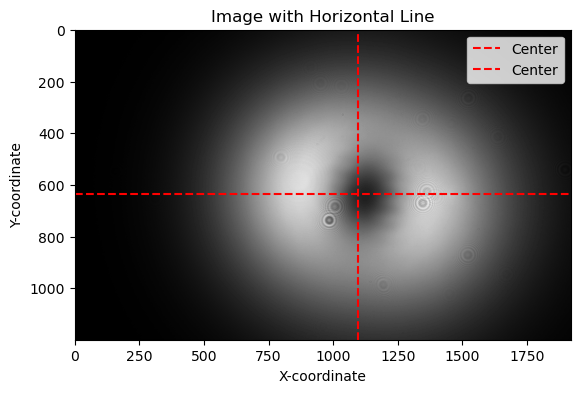

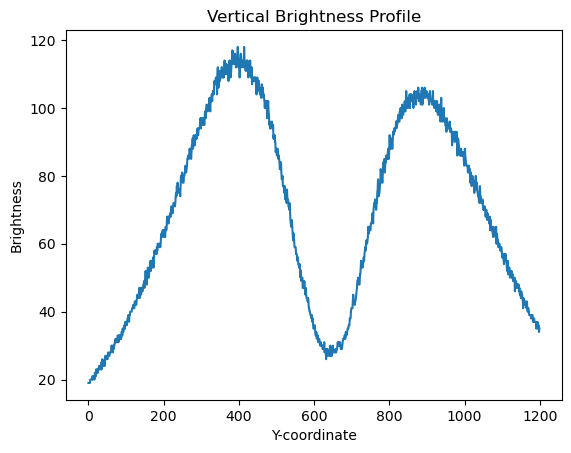

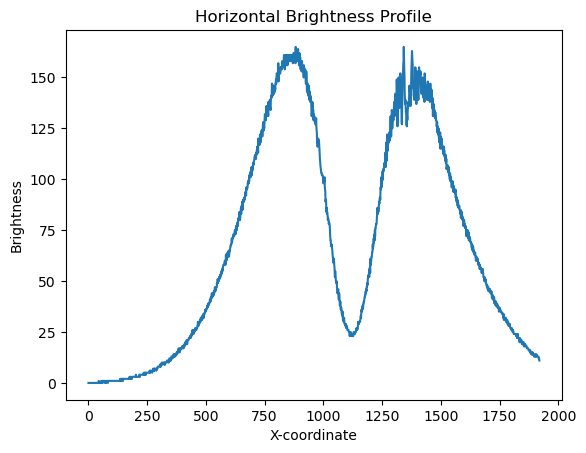

In [2]:
from PIL import Image
import heapq
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Import all images in folder
import os
import glob
# import cv2


# Open the BMP image file
image = Image.open("Enorodovno/66mm.bmp")
image = image.convert("L")

# Retrieve the pixel data
pixels = image.load()

# Get the width and height of the image
width, height = image.size

# Define the number of brightest pixels to find
num_brightest_pixels = 200000

# Define a heap to store the brightest pixels
brightest_pixels_heap = []

# Iterate through each pixel to find the brightest spots
for y in range(height):
    for x in range(width):
        pixel = pixels[x, y]

        # Check if the heap is not yet filled or the current pixel is brighter than the smallest pixel in the heap
        if len(brightest_pixels_heap) < num_brightest_pixels or pixel > brightest_pixels_heap[0][0]:
            # Add the current pixel to the heap
            heapq.heappush(brightest_pixels_heap, (pixel, x, y))

            # If the heap has more than num_brightest_pixels, remove the smallest pixel
            if len(brightest_pixels_heap) > num_brightest_pixels:
                heapq.heappop(brightest_pixels_heap)

# Extract the coordinates of the brightest pixels
brightest_pixel_coordinates = [(x, y) for _, x, y in brightest_pixels_heap]

# Calculate the average coordinates as the center
center_x = sum(x for x, _ in brightest_pixel_coordinates) / num_brightest_pixels
center_y = sum(y for _, y in brightest_pixel_coordinates) / num_brightest_pixels
circle_center = (center_x, center_y)

print("Center coordinates:", circle_center)


# Add horizontal line through the center
plt.figure()
plt.imshow(np.array(image), cmap='gray')
plt.axhline(y=center_y, color='r', linestyle='--', label='Center')

plt.axvline(x=center_x, color='r', linestyle='--', label='Center')
plt.title("Image with Horizontal Line")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend()

# Plot vertical brightness profile
vertical_profile = [pixels[center_x, y] for y in range(height)]
plt.figure()
plt.plot(range(height), vertical_profile)
plt.title("Vertical Brightness Profile")
plt.xlabel("Y-coordinate")
plt.ylabel("Brightness")

# Plot horizontal brightness profile
horizontal_profile = [pixels[x, center_y] for x in range(width)]
plt.figure()
plt.plot(range(width), horizontal_profile)
plt.title("Horizontal Brightness Profile")
plt.xlabel("X-coordinate")
plt.ylabel("Brightness")

# Show the plots
plt.show()


In [3]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Center coordinates: (1110.07616, 639.1382425)


TypeError: list indices must be integers or slices, not list

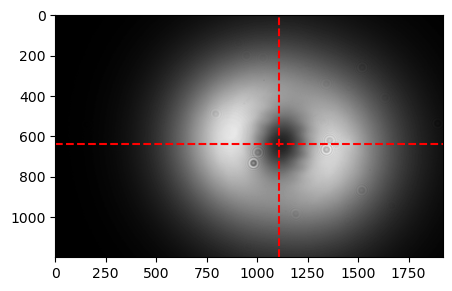

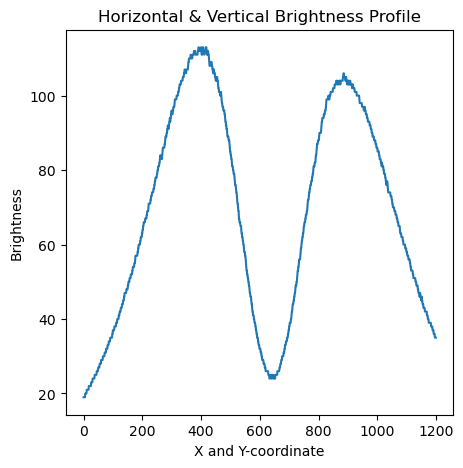

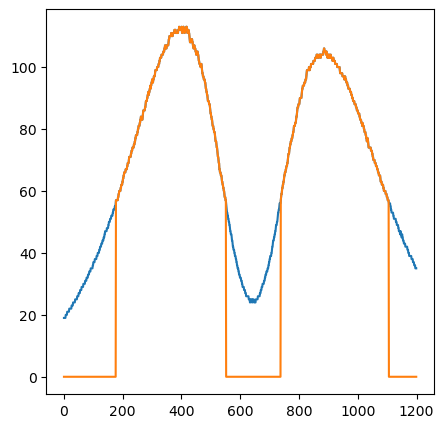

In [15]:
from PIL import Image
import heapq
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Import all images in folder
import os
import glob
import cv2


# Open the BMP image file
image = Image.open("Enorodovno/66mm.bmp")
image = image.convert("L")
image

# Apply Gaussian blur to the image
blurred_image = cv2.GaussianBlur(np.array(image), (5,5), 0)
image = Image.fromarray(blurred_image)

# Retrieve the pixel data
pixels = image.load()

# Get the width and height of the image
width, height = image.size

# Define the number of brightest pixels to find
num_brightest_pixels = 400000

# Define a heap to store the brightest pixels
brightest_pixels_heap = []

# Iterate through each pixel to find the brightest spots
for y in range(height):
    for x in range(width):
        pixel = pixels[x, y]

        # Check if the heap is not yet filled or the current pixel is brighter than the smallest pixel in the heap
        if len(brightest_pixels_heap) < num_brightest_pixels or pixel > brightest_pixels_heap[0][0]:
            # Add the current pixel to the heap
            heapq.heappush(brightest_pixels_heap, (pixel, x, y))

            # If the heap has more than num_brightest_pixels, remove the smallest pixel
            if len(brightest_pixels_heap) > num_brightest_pixels:
                heapq.heappop(brightest_pixels_heap)

# Extract the coordinates of the brightest pixels
brightest_pixel_coordinates = [(x, y) for _, x, y in brightest_pixels_heap]

# Calculate the average coordinates as the center
center_x = sum(x for x, _ in brightest_pixel_coordinates) / num_brightest_pixels
center_y = sum(y for _, y in brightest_pixel_coordinates) / num_brightest_pixels
circle_center = (center_x, center_y)

print("Center coordinates:", circle_center)


# Add horizontal line through the center
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(np.array(image), cmap='gray')
ax.axhline(y=center_y, color='r', linestyle='--', label='Center')
ax.axvline(x=center_x, color='r', linestyle='--', label='Center')

# Plot vertical brightness profile
horizontal_profile = [pixels[x, center_y] for x in range(width)]
vertical_profile = [pixels[center_x, y] for y in range(height)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(range(height), vertical_profile)
# ax.plot(range(width), horizontal_profile)
ax.set_title("Horizontal & Vertical Brightness Profile")
ax.set_xlabel("X and Y-coordinate")
ax.set_ylabel("Brightness")

# Find FWHM of the vertical brightness profile and plot the full profile wtih the FWHM in different color
half_max_brightness = max(vertical_profile) / 2
vertical_profile_FWHM = []
fwhm = 0
for i in range(len(vertical_profile)):
    if vertical_profile[i] > half_max_brightness:
        fwhm += 1
        vertical_profile_FWHM.append(vertical_profile[i])
    else:
        vertical_profile_FWHM.append(0)

# find first non zero number in vertical_profile_FWHM and save as FWHM_minm
FWHMminmax = []
for i in range(len(vertical_profile_FWHM)):
    if vertical_profile_FWHM[i] != 0:
        FWHMminmax.append(i)
        break

# find last non zero number in vertical_profile_FWHM and save as FWHM_maxm
for i in range(len(vertical_profile_FWHM)):
    if vertical_profile_FWHM[-i] != 0:
        FWHMminmax.append(-i)
        break

# vertical_profile_FWHM
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(range(height), vertical_profile, label='Brightness Profile')
ax.plot(range(height), vertical_profile_FWHM, color="C1", label='FWHM')
ax.plot(FWHMminmax[:], vertical_profile_FWHM[FWHMminmax],'x', color="C2",  label='FWHM')
# add arrow from first non zero number to last non zero number in vertical_profile_FWHM and add text with the FWHM value
print(FWHMminmax)
# ax.annotate("", xy=(height[FWHMminmax[0]], 10), xytext=(height[FWHMminmax[-1]], 10), arrowprops=dict(arrowstyle="<->"))

57
57
[177, -95]


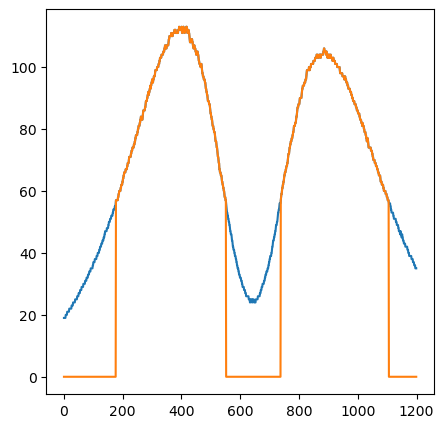

In [24]:
# vertical_profile_FWHM
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(range(height), vertical_profile, label='Brightness Profile')
ax.plot(range(height), vertical_profile_FWHM, color="C1", label='FWHM')
print(vertical_profile[FWHMminmax[0]])
print(vertical_profile[FWHMminmax[-1]])
vertical_profile[FWHMminmax[0]]
# ax.plot(FWHMminmax[:], vertical_profile_FWHM[FWHMminmax],'x', color="C2",  label='FWHM')
# add arrow from first non zero number to last non zero number in vertical_profile_FWHM and add text with the FWHM value
print(FWHMminmax)
# ax.annotate("", xy=(height[FWHMminmax[0]], 10), xytext=(height[FWHMminmax[-1]], 10), arrowprops=dict(arrowstyle="<->"))

## Za vse slike v mapi

In [5]:
from PIL import Image
import heapq
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
# import cv2

def find_centers_in_folder(folder_name):
    # Get the absolute path of the folder
    folder_path = os.path.abspath(folder_name)

    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Folder '{folder_name}' does not exist.")
        return

    # Get a list of all files in the folder
    file_list = os.listdir(folder_path)

    # Filter out only the .bmp files
    bmp_files = [file for file in file_list if file.lower().endswith(".bmp")]

    # Check if there are any .bmp files in the folder
    if len(bmp_files) == 0:
        print("No .bmp files found in the folder.")
        return

    # Iterate through each .bmp file
    for bmp_file in bmp_files:
        # Construct the full path to the .bmp file
        file_path = os.path.join(folder_path, bmp_file)

        # Open the .bmp file and find the center
        print(f"Processing {folder_name}/{bmp_file}...")
        
        image = Image.open(f'{folder_name}/{bmp_file}')
        image = image.convert("L")

        # Retrieve the pixel data
        pixels = image.load()

        # Get the width and height of the image
        width, height = image.size

        # Define the number of brightest pixels to find
        num_brightest_pixels = 200000

        # Define a heap to store the brightest pixels
        brightest_pixels_heap = []

        # Iterate through each pixel to find the brightest spots
        for y in range(height):
            for x in range(width):
                pixel = pixels[x, y]

                # Check if the heap is not yet filled or the current pixel is brighter than the smallest pixel in the heap
                if len(brightest_pixels_heap) < num_brightest_pixels or pixel > brightest_pixels_heap[0][0]:
                    # Add the current pixel to the heap
                    heapq.heappush(brightest_pixels_heap, (pixel, x, y))

                    # If the heap has more than num_brightest_pixels, remove the smallest pixel
                    if len(brightest_pixels_heap) > num_brightest_pixels:
                        heapq.heappop(brightest_pixels_heap)

        # Extract the coordinates of the brightest pixels
        brightest_pixel_coordinates = [(x, y) for _, x, y in brightest_pixels_heap]

        # Calculate the average coordinates as the center
        center_x = sum(x for x, _ in brightest_pixel_coordinates) / num_brightest_pixels
        center_y = sum(y for _, y in brightest_pixel_coordinates) / num_brightest_pixels
        circle_center = (center_x, center_y)

        print("Center coordinates:", circle_center)

        fig, axes = plt.subplots(2, 2, figsize=(8, 8))
        axes[0, 0].imshow(np.array(image), cmap='gray')
        axes[0, 0].hlines(y=center_y, xmin=0, xmax=100000, color='r', linestyle='--')
        axes[0, 0].vlines(x=center_x, ymin=0, ymax=100000, color='r', linestyle='--', label='Center')
        axes[0, 0].set_title("Image with Horizontal Line")
        axes[0, 0].set_xlabel("X-coordinate")
        axes[0, 0].set_ylabel("Y-coordinate")
        axes[0, 0].legend()

        # Plot vertical brightness profile
        # vertical_profile = [pixels[center_x, y] for y in range(height)]
        # plt.figure()
        # plt.plot(range(height), vertical_profile)
        # plt.title("Vertical Brightness Profile")
        # plt.xlabel("Y-coordinate")
        # plt.ylabel("Brightness")

        # # Plot horizontal brightness profile
        # horizontal_profile = [pixels[x, center_y] for x in range(width)]
        # plt.figure()
        # plt.plot(range(width), horizontal_profile)
        # plt.title("Horizontal Brightness Profile")
        # plt.xlabel("X-coordinate")
        # plt.ylabel("Brightness")
    return 1


Processing Enorodovno/50mm_min.bmp...
Center coordinates: (1071.5653, 616.796925)
Processing Enorodovno/54mm.bmp...
Center coordinates: (1088.13283, 626.075645)
Processing Enorodovno/58mm.bmp...
Center coordinates: (1134.433955, 625.19935)
Processing Enorodovno/62mm.bmp...
Center coordinates: (1115.589145, 629.30058)
Processing Enorodovno/66mm.bmp...
Center coordinates: (1096.39797, 634.684975)
Processing Enorodovno/70mm.bmp...
Center coordinates: (1046.437555, 640.377155)
Processing Enorodovno/74mm.bmp...
Center coordinates: (989.553625, 647.318305)
Processing Enorodovno/78mm_max.bmp...
Center coordinates: (980.95419, 650.57822)


1

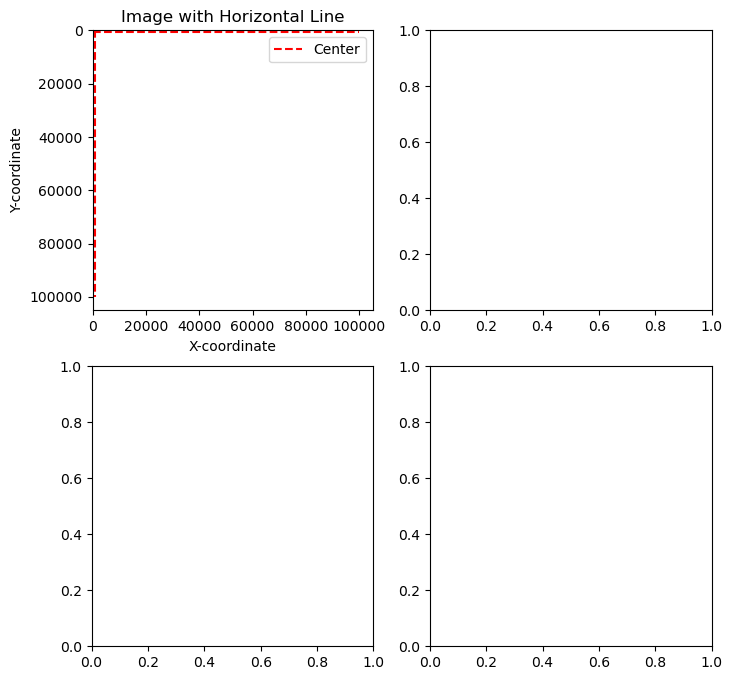

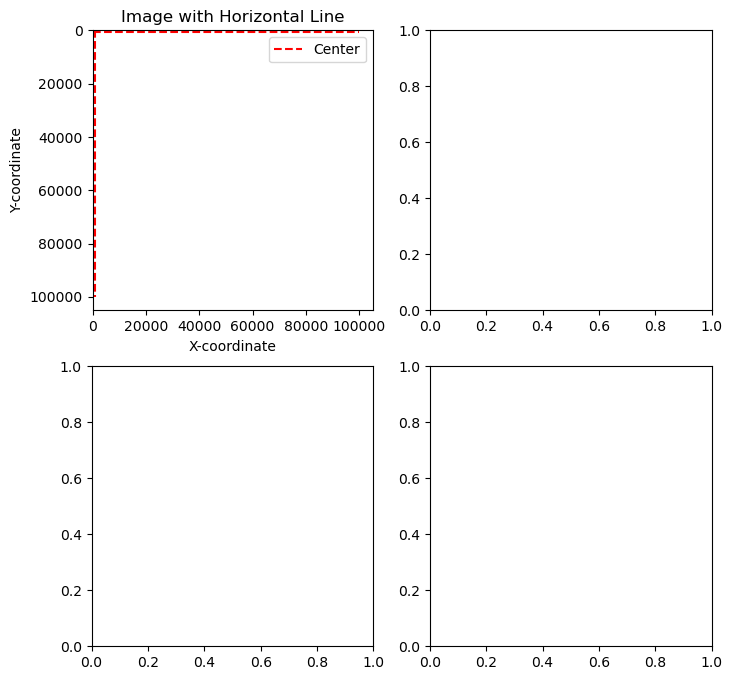

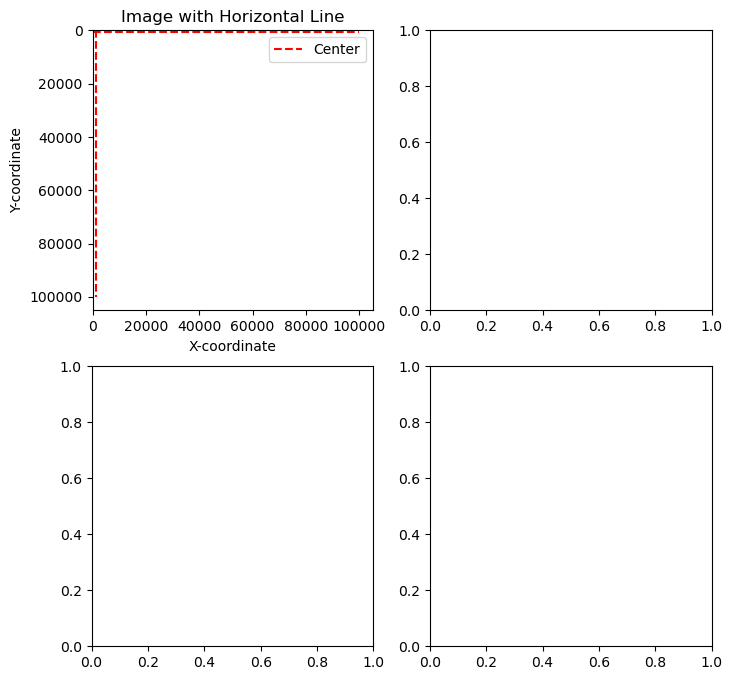

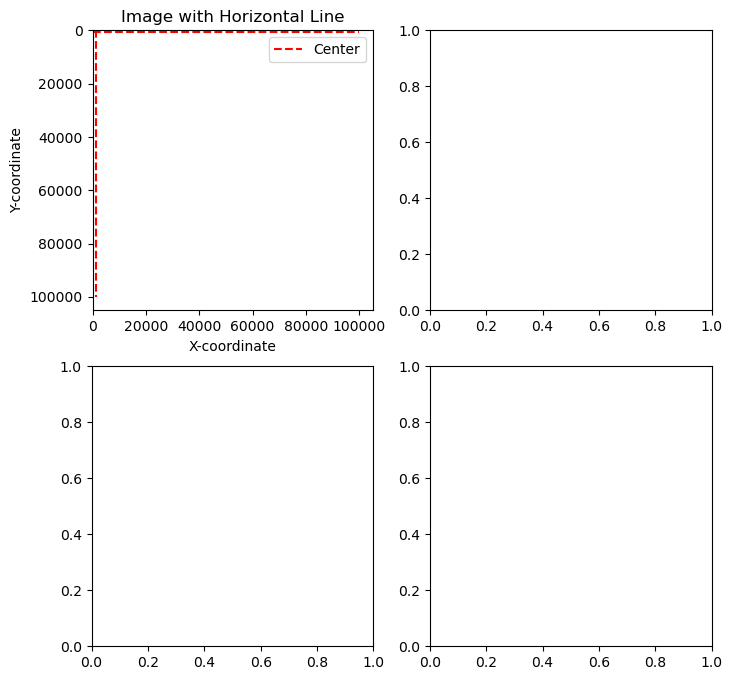

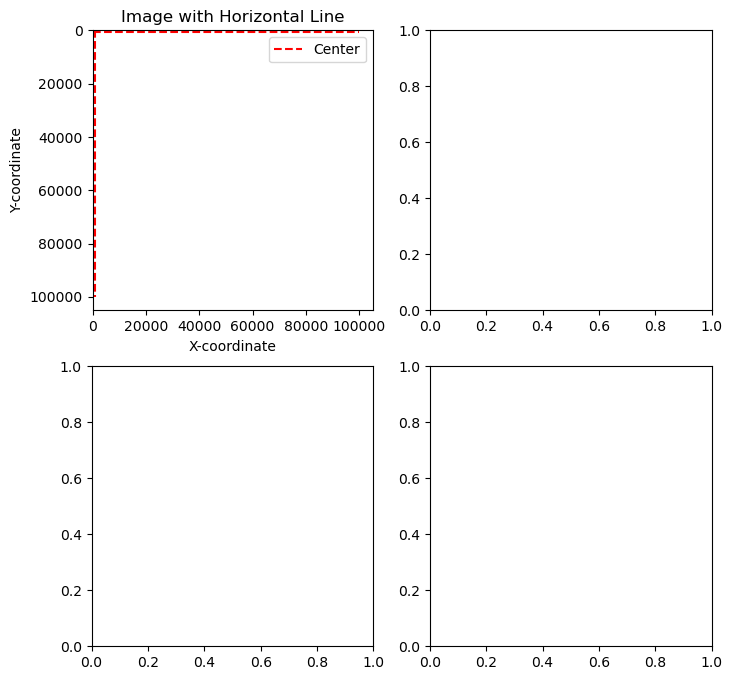

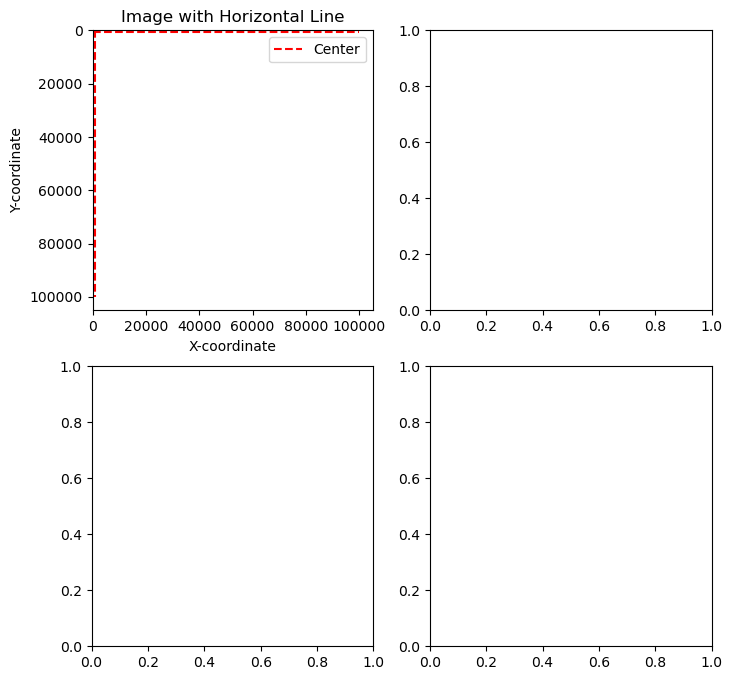

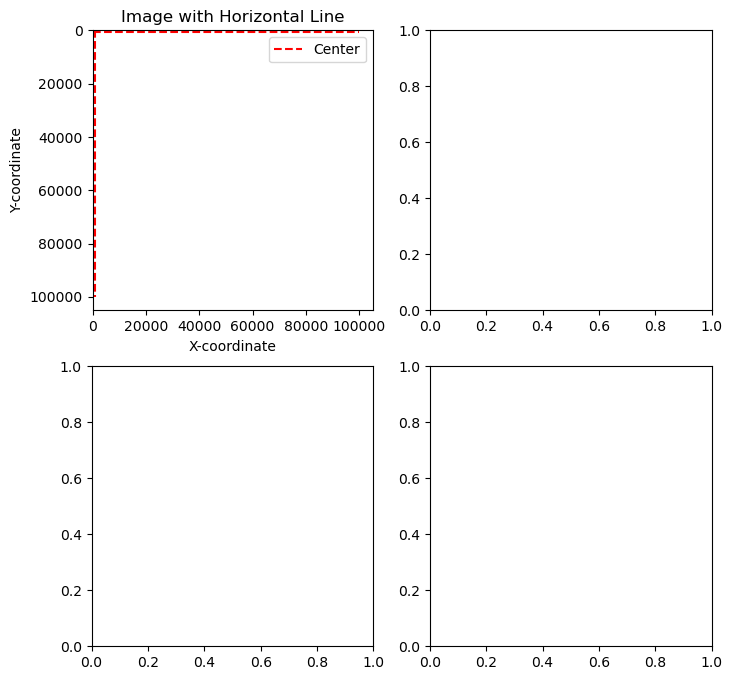

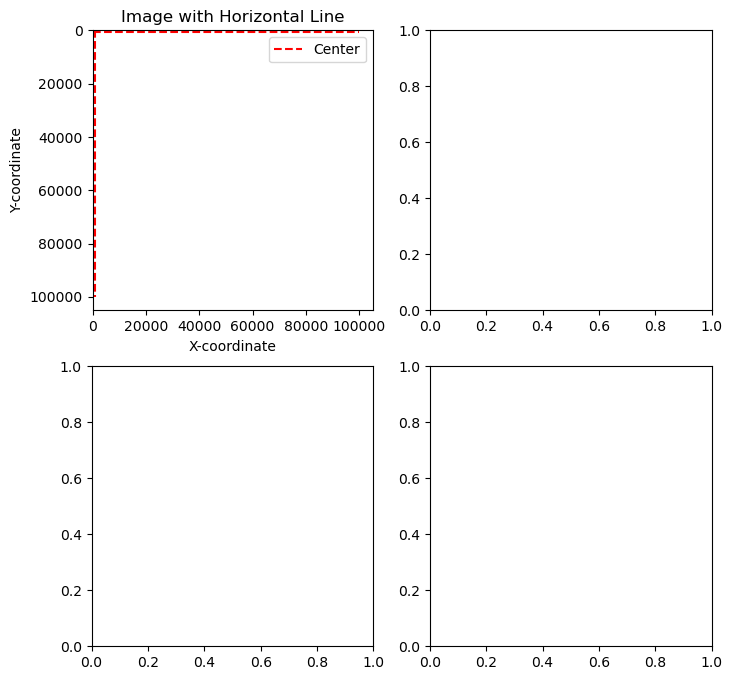

In [6]:
find_centers_in_folder("Enorodovno")

(0.0, 1.0, 0.0, 1.0)

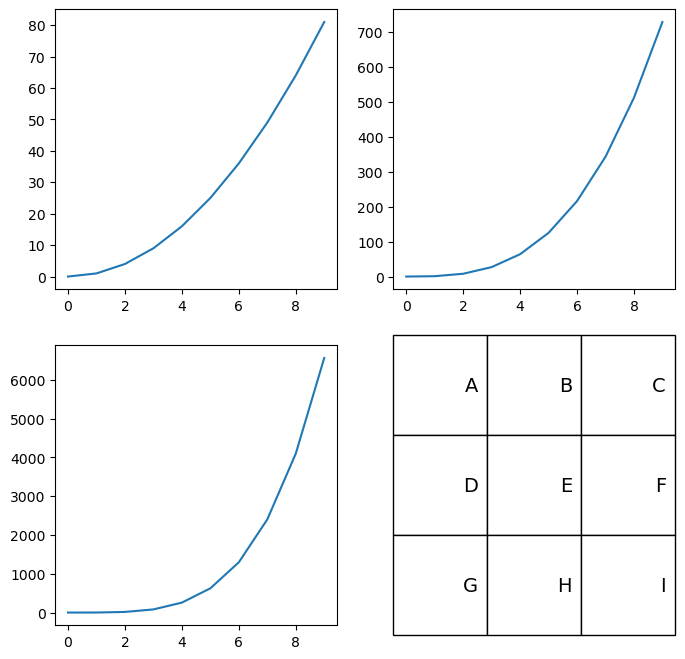

In [7]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(10);
# create figure with 4 axes, two rows of two axes

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes[0, 0].plot(t, t**2)

axes[0, 1].plot(t, t**3)

axes[1, 0].plot(t, t**4)


data = [['A', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I']]
table = axes[1, 1].table(cellText=data, loc='center')
table.set_fontsize(14)
table.scale(1, 6)  # change size of table

axes[1, 1].axis('off')  # Turn off the axis for the table


Center coordinates: (1096.33934, 634.83841)


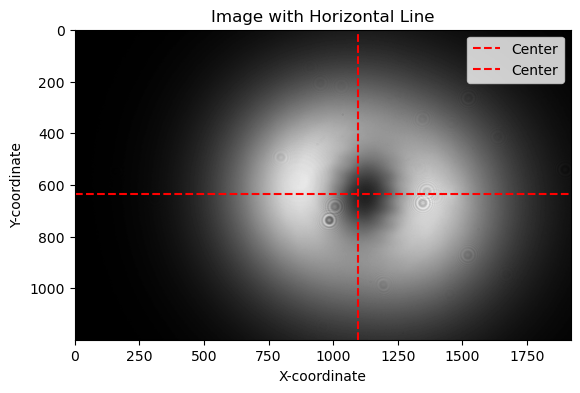

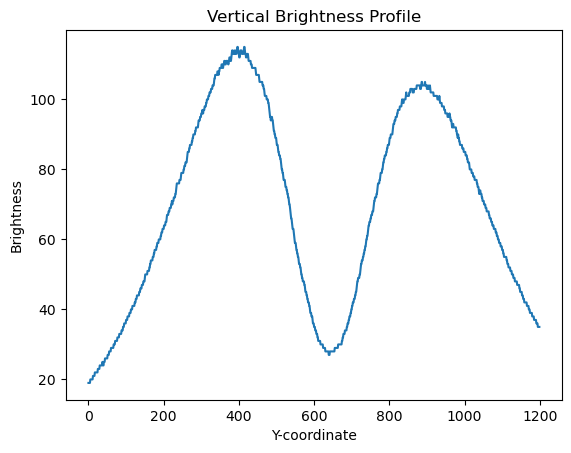

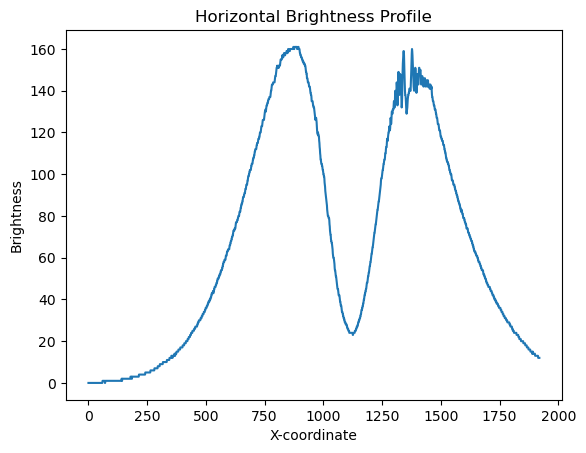

In [8]:
from PIL import Image
import heapq
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Open the BMP image file
image = Image.open("Enorodovno/66mm.bmp")
image = image.convert("L")

# Convert the image to a NumPy array
image_array = np.array(image)

# Apply Gaussian blur to the image
blurred_image_array = cv2.GaussianBlur(image_array, (5, 5), 0)  # Adjust the kernel size as needed

# Convert the blurred image array back to a PIL image
blurred_image = Image.fromarray(blurred_image_array)

# Retrieve the pixel data
pixels = blurred_image.load()

# Get the width and height of the image
width, height = blurred_image.size

# Define the number of brightest pixels to find
num_brightest_pixels = 200000

# Define a heap to store the brightest pixels
brightest_pixels_heap = []

# Iterate through each pixel to find the brightest spots
for y in range(height):
    for x in range(width):
        pixel = pixels[x, y]

        # Check if the heap is not yet filled or the current pixel is brighter than the smallest pixel in the heap
        if len(brightest_pixels_heap) < num_brightest_pixels or pixel > brightest_pixels_heap[0][0]:
            # Add the current pixel to the heap
            heapq.heappush(brightest_pixels_heap, (pixel, x, y))

            # If the heap has more than num_brightest_pixels, remove the smallest pixel
            if len(brightest_pixels_heap) > num_brightest_pixels:
                heapq.heappop(brightest_pixels_heap)

# Extract the coordinates of the brightest pixels
brightest_pixel_coordinates = [(x, y) for _, x, y in brightest_pixels_heap]

# Calculate the average coordinates as the center
center_x = sum(x for x, _ in brightest_pixel_coordinates) / num_brightest_pixels
center_y = sum(y for _, y in brightest_pixel_coordinates) / num_brightest_pixels
circle_center = (center_x, center_y)

print("Center coordinates:", circle_center)

# Add horizontal line through the center
plt.figure()
plt.imshow(blurred_image, cmap='gray')
plt.axhline(y=center_y, color='r', linestyle='--', label='Center')
plt.axvline(x=center_x, color='r', linestyle='--', label='Center')
plt.title("Image with Horizontal Line")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend()

# Plot vertical brightness profile
vertical_profile = [pixels[center_x, y] for y in range(height)]
plt.figure()
plt.plot(range(height), vertical_profile)
plt.title("Vertical Brightness Profile")
plt.xlabel("Y-coordinate")
plt.ylabel("Brightness")

# Plot horizontal brightness profile
horizontal_profile = [pixels[x, center_y] for x in range(width)]
plt.figure()
plt.plot(range(width), horizontal_profile)
plt.title("Horizontal Brightness Profile")
plt.xlabel("X-coordinate")
plt.ylabel("Brightness")

# Show the plots
plt.show()
